In [1]:
#Importing all the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import zscore

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import silhouette_score, confusion_matrix, classification_report

from scipy.spatial.distance import cdist, pdist

from sklearn import svm

from sklearn.cluster import KMeans, AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram, cophenet

from sklearn.decomposition import PCA


# Part - A 

### 1. Data Understanding & Exploration: [5 Marks]

#### 1A. Read ‘Car name.csv’ as a DataFrame and assign it to a variable. [1 Mark]

In [2]:
#Reading the 'Car name.csv' & displaying the top 5 rows
cn =pd.read_csv('D:/Great Learning/Study Material/6. Module-5_Unsupervised Learning/Unsupervised Learning - Project/Car name.csv')
cn.head()

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino


#### 1B. Read ‘Car-Attributes.json as a DataFrame and assign it to a variable. [1 Mark]

In [3]:
#Reading the 'Car-Attributes.json' file & displaying top 5 rows.
ca = pd.read_json('D:/Great Learning/Study Material/6. Module-5_Unsupervised Learning/Unsupervised Learning - Project/Car-Attributes.json')
ca.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


### 1C. Merge both the DataFrames together to form a single DataFrame [2 Mark]

In [4]:
#Merging  both the DataFrames & dispalying the top rows
car = pd.concat([ca, cn], axis=1)
car.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


#### 1D. Print 5 point summary of the numerical features and share insights. [1 Marks]

In [5]:
#Printing 5 point summary of Numerical features using .describe()
#Since 'ca' is a dataframe with numerical feature we proceed with that dataframe and as 'car_name' feature doesnot provide 
#any significant in model builiding we would be required to further drop that columns. Hence we use 'ca' dataset only.
ca.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


##### Insights
- The count for all the featues is 398 which suggests that there is no null values in the given dataset for all these numerical features.
- From the data it is visible that the units of all the features are diffenrent hence they are needed to be standardized before model making
- The mean and median for feature 'mpg', 'acc', and 'yr' is almost same from which it can be said that these features may have Normal Distribution
- While features 'cyl', 'disp' and 'wt' seems to be skewed rightly a little.

### 2. Data Preparation & Analysis: [10 Marks]

#### 2A. Check and print feature-wise percentage of missing values present in the data and impute with the best suitable approach. [2 Mark]

In [6]:
#Checking & printing missing values featurewise
car_mv = pd.DataFrame({'No. of Missing Values': car.isnull().sum(), '% of Missing Values': car.isnull().sum()/car.shape[0]})
car_mv

,No. of Missing Values,% of Missing Values
mpg,0,0.0
cyl,0,0.0
disp,0,0.0
hp,0,0.0
wt,0,0.0
acc,0,0.0
yr,0,0.0
origin,0,0.0
car_name,0,0.0


- From the above data it seems that there are no missing values in the dataframe.

#### 2B. Check for duplicate values in the data and impute with the best suitable approach. [1 Mark]

In [7]:
#Checking for duplicates in the dataset
car[car.duplicated()]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name


#### 2C. Plot a pairplot for all features. [1 Marks]

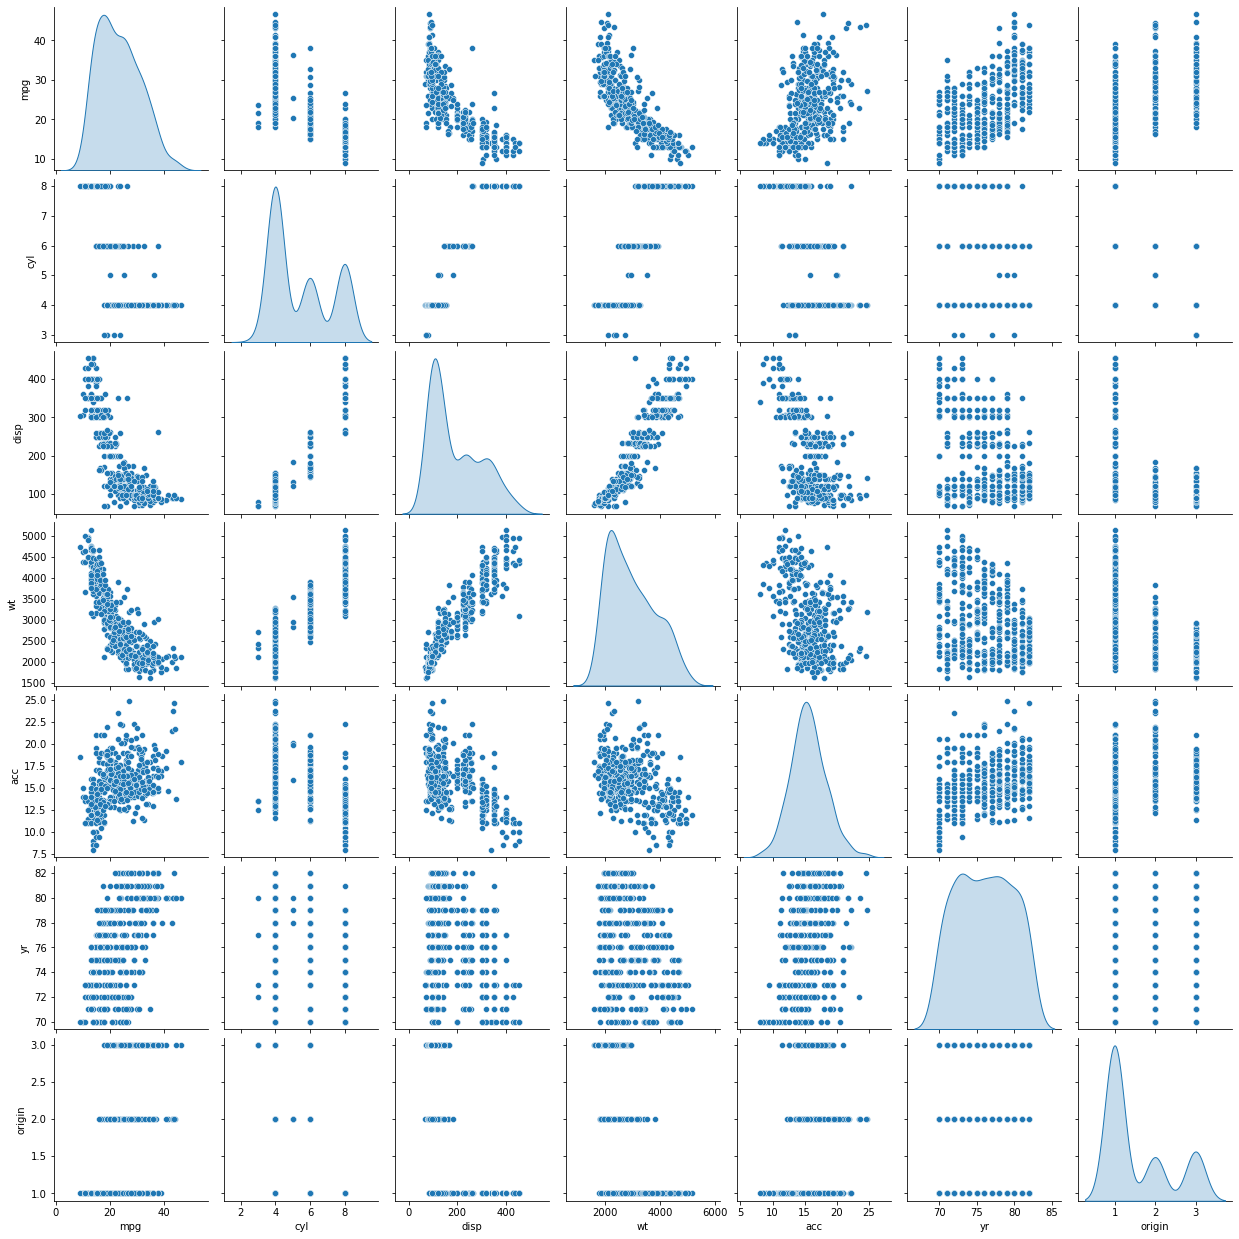

In [8]:
#Plotting a pairplot
sns.pairplot(car, diag_kind='kde');

#### 2D. Visualize a scatterplot for ‘wt’ and ‘disp’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

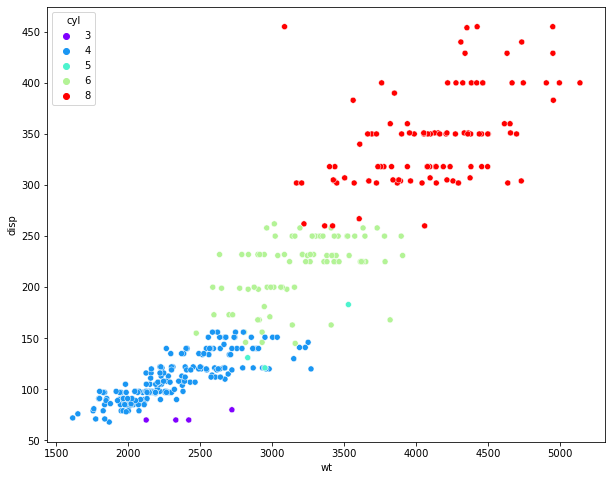

In [9]:
#Scatterplot for  'wt' vs 'disp' with 'cyl' as hue.
plt.figure(figsize=(10,8))
sns.scatterplot(data=car, x='wt', y='disp', hue='cyl', palette='rainbow');

#### 2E. Share insights for Q2.d. [1 Marks]

From the graph of 'wt' vs 'disp', following points can be observed:
- There are maximum nos of cars with 'cyl' values of 4, 6 & 8.
- Nos. of car with 'cyl' value of 3 & 5 are very less.
- Further, a positive correlation can be observed between 'wt' & 'disp', i.e. with increase in 'wt', 'disp' also increases.
- It can be noted that the 'cyl' values increases with increase in 'wt' & 'disp' values.
- A highly noticeable point is, as the 'cyl' values increase, its scatteredness also increase. It means that the lower 'cyl' value cars are clustered together than compared to that of cars with 'cyl' values higher. Hence it can be infered that higher the 'cyl' values, wider the range of 'wt' & 'disp'.

#### 2F. Visualize a scatterplot for ‘wt’ and ’mpg’. Datapoints should be distinguishable by ‘cyl’. [1 Marks]

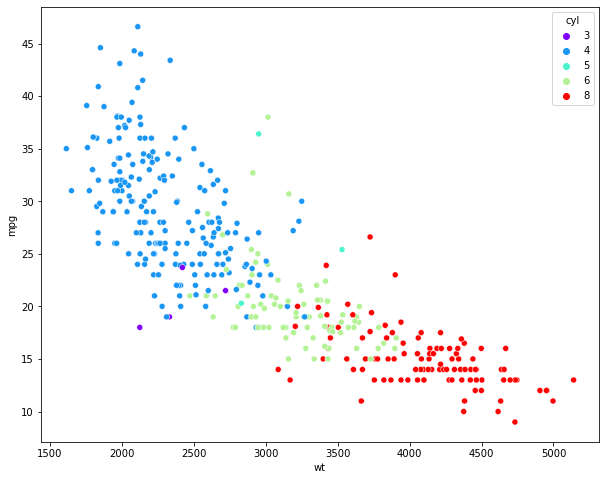

In [10]:
#Scatterplot for  'wt' vs 'disp' with 'cyl' as hue.
plt.figure(figsize=(10,8))
sns.scatterplot(data=car, x='wt', y='mpg', hue='cyl', palette='rainbow');

#### 2G. Share insights for Q2.f. [1 Marks]

From the graph of 'wt' vs 'mpg', following points can be noted:
- There are maximum cars with 'cyl' 4, 6 & 8.
- A negative correlation can be infered between 'wt' and 'mpg', i.e. with increase in 'wt', 'mpg' decreases.
- It can further be noted that for cars with 'cyl' value 4, 6 & 8, with increse in 'cyl' value, 'wt' increases while 'mpg' decreases.
- While the same pattern can be observed for cars with odd 'cyl' numbers i.e. 3 & 5.
- The cars with lower 'cyl' number (4) has wider range of 'mpg' but a small range of 'wt', while for cars with higher 'cyl' number (8) has lower range of 'mpg' but wider range of 'wt'. The same cannot be infered for cars with 'cyl' value of 6 as it shows same range expansion for 'wt' and 'mpg'.

#### 2H. Check for unexpected values in all the features and datapoints with such values. [2 Marks]

In [11]:
#Getting the info of car dataset
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


- Here it should be noted that 'hp' column is represented as 'object' datatype instead of numerical datatype.
- This suggest that there may be some discrepancy in the columns which needs to be checked.
- All the other feature shows correct datatype and there are no null values present. This suggest that all these features maybe left untouched for now.
- Hence we proceed to convert 'hp' feature to numerical datatype.

In [12]:
#Converting the 'hp' column to numerical datatype
car['hp'] = pd.to_numeric(car['hp'], errors='coerce')

#Checking the info of car dataset after converting 'hp' feature to numeric datatype
print(car.info(), '\n')
#Checking for null values
print('Checking for any null values:')
car.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        392 non-null    float64
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB
None 

Checking for any null values:


mpg         0
cyl         0
disp        0
hp          6
wt          0
acc         0
yr          0
origin      0
car_name    0
dtype: int64

- Here we can see that after converting to numeric datatype, there are 6 null values present.
- We further impute these null values by replacing them with median value of that particular column (in this case 'hp' column).
- Further it can be noted that 'car_name' feature in the dataset is insignificant. Hence we can proceed to remove the feature for the dataset

In [13]:
#Dropping the 'car_name' feature
car = car.drop('car_name', axis=1)
#Displaying the top 5 rows of dataframe after dropping 'car_name' feature
display(car.head())
print('\n')

#Imputing the null values in 'hp' feature & displaying the info of dataframe after imputing.
medfill = lambda x: x.fillna(x.median())
car = car.apply(medfill, axis=0)
car.info()

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     398 non-null    float64
 1   cyl     398 non-null    int64  
 2   disp    398 non-null    float64
 3   hp      398 non-null    float64
 4   wt      398 non-null    int64  
 5   acc     398 non-null    float64
 6   yr      398 non-null    int64  
 7   origin  398 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


- Here we can see that there are no null values present & the dataype of each feature is represented in correct format. Hence we can proceed further.

### 3. Clustering: [15 Marks]

#### 3A. Apply K-Means clustering for 2 to 10 clusters. [3 Marks]

- Before Applying K-Means Clustering we need to scale the dataset in order to avoid giving weightage to feature with higher numerical values.
- Hence we apply zscore on the dataframe.

In [14]:
#Applying zscore
cars = car.apply(zscore)
display(cars.describe())

,mpg,cyl,disp,hp,wt,acc,yr,origin
count,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02,3.980000e+02
mean,2.761610e-16,-5.171742e-16,-8.312725e-17,1.458911e-16,-9.902743e-17,8.982206e-17,-8.837152e-16,-4.781212e-16
std,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00,1.001259e+00
min,-1.859374e+00,-1.444949e+00,-1.204411e+00,-1.527300e+00,-1.604943e+00,-2.747814e+00,-1.627426e+00,-7.151448e-01
25%,-7.704907e-01,-8.563206e-01,-8.563178e-01,-7.414364e-01,-8.828266e-01,-6.328794e-01,-8.150739e-01,-7.151448e-01
50%,-6.591883e-02,-8.563206e-01,-4.314040e-01,-2.830161e-01,-1.973624e-01,-2.472221e-02,-2.721449e-03,-7.151448e-01
75%,7.027050e-01,1.498191e+00,6.584879e-01,5.421404e-01,7.538337e-01,5.834349e-01,8.096310e-01,5.332220e-01
max,2.957335e+00,1.498191e+00,2.511784e+00,3.292662e+00,2.565185e+00,3.351912e+00,1.621983e+00,1.781589e+00


In [15]:
#Applying K-Means  clustering for k=2 to 10
clusts = range(2, 11)
meandist = []
err = []
sil_score = []
for k in clusts:
    kclust = KMeans(n_clusters=k)
    kclust.fit(cars)
    kclust_pred = kclust.predict(cars)
    meandist.append(sum(np.min(cdist(cars, kclust.cluster_centers_, 'euclidean'), axis=1))/cars.shape[0])
    err.append(kclust.inertia_)
    sil_score.append(silhouette_score(cars, kclust.labels_))

KClust = pd.DataFrame({'Clusters': clusts, 'Mean_Dist': meandist, 'Cluster_Erros': err, 'Silhouette': sil_score})
KClust

C:\Users\smit1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\smit1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Window

,Clusters,Mean_Dist,Cluster_Erros,Silhouette
0,2,1.914462,1588.592457,0.414892
1,3,1.630974,1190.043653,0.324667
2,4,1.479277,988.068834,0.311969
3,5,1.336291,829.715787,0.332970
4,6,1.272513,760.185462,0.288236
5,7,1.214935,680.764361,0.293846
6,8,1.183254,633.221506,0.287496
7,9,1.137686,602.356601,0.265070
8,10,1.109805,560.536869,0.257029


#### 3B. Plot a visual and find elbow point. [2 Marks]

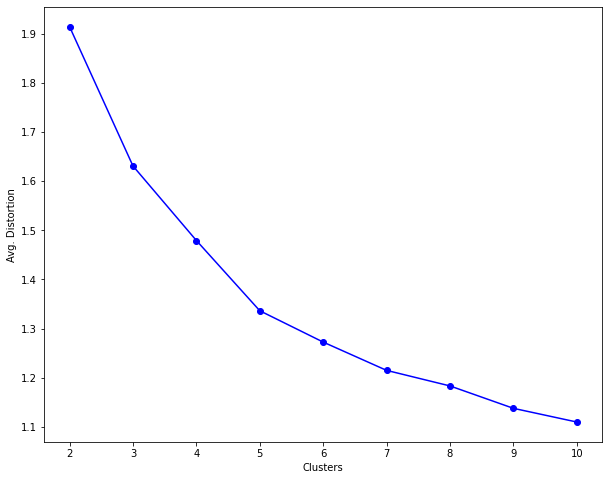

In [16]:
plt.figure(figsize=(10,8))
plt.plot(clusts, meandist, 'bo-')
plt.xlabel('Clusters')
plt.ylabel('Avg. Distortion')
plt.show();

- From the above plot, k=7 can be considered as 'Elbow' Point.

#### 3C. On the above visual, highlight which are the possible Elbow points. [1 Marks]

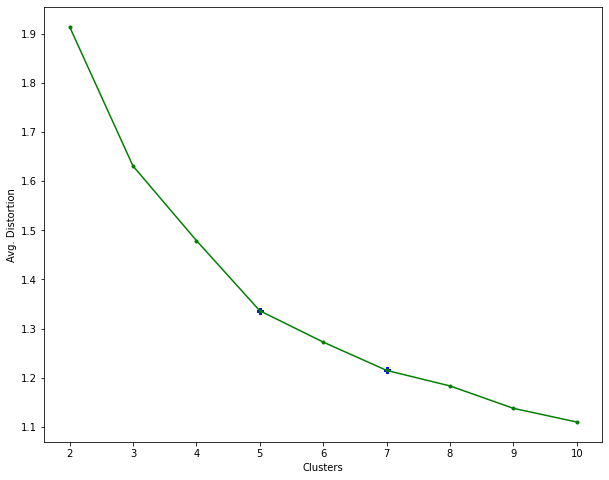

In [17]:
#From the above plot, k=5 and k=7 can be considered as possible Elbow Points. Hence we highlight only those 2 points.
plt.figure(figsize=(10,8))
plt.plot(clusts, meandist, 'go-', markersize=3)
plt.scatter(x=[5, 7], y=[meandist[3], meandist[5]], marker='P', color='b', alpha=1)
plt.xlabel('Clusters')
plt.ylabel('Avg. Distortion')
plt.show();

#### 3D. Train a K-means clustering model once again on the optimal number of clusters. [3 Marks]

In [18]:
#Getting the data point value from the user
tp = int(np.random.randint(0, cars.shape[0], 1))
print('The test data point selected at random is (Row No.)',tp)

#We train a model with 1 data less than actual dataset (We remove the data point received in input) 
train = cars.drop(tp, axis=0)
test_data = cars.iloc[tp, :]
test = pd.DataFrame(test_data).T

#Considering k=7 we train a model
Kmod = KMeans(n_clusters=7, random_state=1)
Kmod.fit(train)

The test data point selected at random is (Row No.) 396


C:\Users\smit1\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(n_clusters=7, random_state=1)

#### 3E. Add a new feature in the DataFrame which will have labels based upon cluster value. [2 Marks]

In [19]:
#Adding Labels as new feature in DataFrame based upon cluster value
train['Labels'] = Kmod.labels_
train

,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-0.715145,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-0.715145,6
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-0.715145,6
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-0.715145,6
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-0.715145,6
...,...,...,...,...,...,...,...,...,...
392,0.446497,-0.856321,-0.407398,-0.374700,-0.024149,0.628820,1.621983,-0.715145,0
393,0.446497,-0.856321,-0.513026,-0.479482,-0.213324,0.011586,1.621983,-0.715145,0
394,2.624265,-0.856321,-0.925936,-1.370127,-0.993671,3.279296,1.621983,0.533222,4
395,1.087017,-0.856321,-0.561039,-0.531873,-0.798585,-1.440730,1.621983,-0.715145,0


#### 3F. Plot a visual and color the datapoints based upon clusters. [2 Marks]

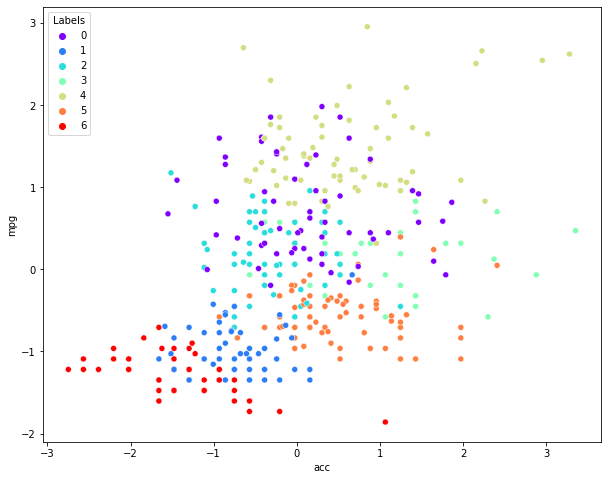

In [20]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=train, x='acc', y='mpg', hue='Labels', palette='rainbow');

#### 3G. Pass a new DataPoint and predict which cluster it belongs to. [2 Marks]

In [21]:
#Passing a New DataPoint
NewDataPredict = Kmod.predict(test)
print('The New Data Point is identified in cluster no:', int(NewDataPredict))

#NOTE: Please run the cell no 3D, 3E & 3F before running this cell

The New Data Point is identified in cluster no: 0


In [22]:
#Adding the label column to this test dataframe
test['Labels'] = NewDataPredict
test

#NOTE: Please run the cell no 3D, 3E, 3F & 3G before running this cell

,mpg,cyl,disp,hp,wt,acc,yr,origin,Labels
396,0.574601,-0.856321,-0.705077,-0.66285,-0.408411,1.100822,1.621983,-0.715145,0


- From the above dataset we can get the details of label in which cluset new datapoint belongs to.

# Part - B

### 1. Data Understanding & Cleaning: [5 Marks]

#### 1A. Read ‘vehicle.csv’ and save as DataFrame. [1 Marks]

In [23]:
#Reading the csv file & displaying top 5 rows.
veh = pd.read_csv('D:/Great Learning/Study Material/6. Module-5_Unsupervised Learning/Unsupervised Learning - Project/vehicle.csv')
display(veh.head())
veh.info()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

#### 1B. Check percentage of missing values and impute with correct approach. [1 Marks]

In [24]:
#Checking the percentage of missing values
Missing_Vals = pd.DataFrame({'Missing Val': veh.isnull().sum(), '% Missing Val': veh.isnull().sum()/veh.shape[0]})
Missing_Vals

,Missing Val,% Missing Val
compactness,0,0.000000
circularity,5,0.005910
distance_circularity,4,0.004728
radius_ratio,6,0.007092
pr.axis_aspect_ratio,2,0.002364
max.length_aspect_ratio,0,0.000000
scatter_ratio,1,0.001182
elongatedness,1,0.001182
pr.axis_rectangularity,3,0.003546
max.length_rectangularity,0,0.000000


In [25]:
#Imputing null values with median values
medifill = lambda x: x.fillna(x.median())
veh.iloc[:, :-1] = veh.iloc[:, :-1].apply(medifill, axis=0)
print(veh.isnull().sum(), '\n')
print(veh.info(), '\n')
veh.describe().T

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circula

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


- Here we can see that we have imputed all null values with median values of that particular columns & there are no further null values present.

#### 1C. Visualize a Pie-chart and print percentage of values for variable ‘class’. [2 Marks]

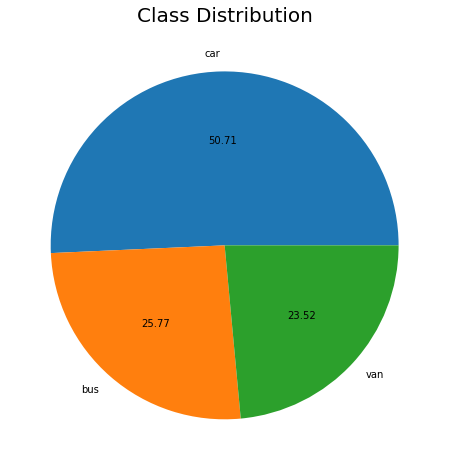

In [26]:
plt.figure(figsize=(9,8))
plt.pie(veh['class'].value_counts(), labels=veh['class'].value_counts().index, autopct='%.2f')
plt.title('Class Distribution', fontdict = {'fontsize': 20})
plt.show();


#### 1D. Check for duplicate rows in the data and impute with correct approach. [1 Marks]

In [27]:
#Checking for Duplicate values
veh_dup = veh.duplicated()
veh_dup.sum()

0

- Here we can see that there are no duplicate rows in data.

### 2. Data Preparation: [2 Marks]

#### 2A. Split data into X and Y. [Train and Test optional] [1 Marks]

In [28]:
#Splitting the dataset into X & Y
x = veh.drop('class', axis=1)
y= veh['class']

#Splitting the dataset into Train & Test after standardization

#### 2B. Standardize the Data. [1 Marks]

In [29]:
#Standardizing the feature dataset using zscore
xscaled = x.apply(zscore)
xscaled.describe()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
count,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02,8.460000e+02
mean,5.572112e-16,-1.018361e-16,2.370051e-16,8.871286e-17,3.732239e-16,-2.036721e-16,-4.391024e-16,-8.582575e-17,-4.320159e-16,7.968409e-16,-8.845039e-17,-1.057730e-16,1.742761e-16,-1.785904e-16,-2.782119e-17,-3.910715e-17,-1.370850e-15,1.544470e-15
std,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00,1.000592e+00
min,-2.512695e+00,-1.928651e+00,-2.676060e+00,-1.943427e+00,-1.863187e+00,-1.428157e+00,-1.714617e+00,-1.913112e+00,-1.383974e+00,-2.067876e+00,-1.869604e+00,-1.447426e+00,-2.020069e+00,-1.801003e+00,-1.298215e+00,-1.411710e+00,-2.101034e+00,-1.968200e+00
25%,-8.115196e-01,-7.868465e-01,-7.691502e-01,-8.350318e-01,-5.937529e-01,-3.408453e-01,-6.597038e-01,-1.016511e+00,-6.108857e-01,-7.581695e-01,-6.890755e-01,-6.863374e-01,-7.903227e-01,-7.292377e-01,-8.900807e-01,-8.515285e-01,-7.999271e-01,-7.239842e-01
50%,-8.244465e-02,-1.343867e-01,-1.335137e-01,-5.615980e-02,-8.597938e-02,-1.233829e-01,-3.583000e-01,2.643474e-01,-2.243417e-01,-1.377823e-01,-3.062013e-01,-4.298065e-01,-3.710316e-02,-1.263695e-01,-7.381157e-02,-1.793110e-01,-1.493736e-01,1.839573e-01
75%,7.681428e-01,6.811881e-01,1.010632e+00,7.826254e-01,4.217941e-01,3.115419e-01,8.774555e-01,6.486049e-01,9.352903e-01,7.583325e-01,9.062337e-01,8.358405e-01,7.161164e-01,3.425279e-01,5.383902e-01,7.169791e-01,6.638184e-01,7.219967e-01
max,3.076880e+00,2.312338e+00,1.900523e+00,4.916638e+00,9.688661e+00,1.009735e+01,2.896861e+00,2.569893e+00,3.254554e+00,2.757358e+00,4.192571e+00,3.280679e+00,2.868172e+00,8.380770e+00,3.191265e+00,3.181777e+00,2.778117e+00,2.067095e+00


In [30]:
#Splitting the dataset into Train & Test Dataset
x_tr, x_te, y_tr, y_te = train_test_split(xscaled, y, test_size=0.2, random_state=1234)

### 3. Model Building: [13 Marks]

#### 3A. Train a base Classification model using SVM. [1 Marks]

In [31]:
#Training a Classification Model for SVM
veh_svm = svm.SVC()
veh_svm.fit(x_tr, y_tr)

SVC()

#### 3B. Print Classification metrics for train data. [1 Marks]

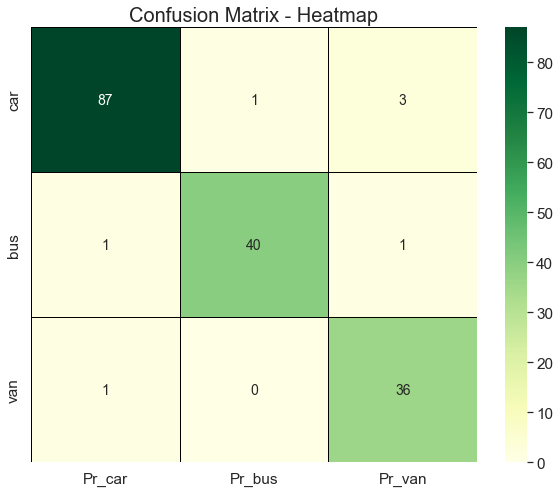

------------------------------  Classification Report  ------------------------------
              precision    recall  f1-score   support

         car       0.98      0.96      0.97        91
         bus       0.98      0.95      0.96        42
         van       0.90      0.97      0.94        37

    accuracy                           0.96       170
   macro avg       0.95      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



In [32]:
#Predicting the values for test dataset
veh_pred = veh_svm.predict(x_te)

#Generating Confusion Matrix
veh_cm = confusion_matrix(y_te, veh_pred, labels= veh['class'].value_counts().index)

#Generating DataFrame of Confusion Matrix
col_lab = ['Pr_' + str(n) for n in veh['class'].value_counts().index]
veh_cmdf = pd.DataFrame(veh_cm, index = veh['class'].value_counts().index, columns = col_lab)

#Generating heatmap
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4) #to increasefont size of labels and axes
sns.heatmap(veh_cmdf, annot=True, linewidth=1, cmap='YlGn', linecolor='black', annot_kws={'fontsize':'small'})
plt.title('Confusion Matrix - Heatmap', fontdict={'fontsize': 20})
plt.show();

#Generating Classifiction Report
print('-'*30, '\033[1;3m Classification Report \033[0m', '-'*30)
print(classification_report(y_te, veh_pred, labels=veh['class'].value_counts().index))

#### 3C. Apply PCA on the data with 10 components. [3 Marks]

In [33]:
veh_pca = PCA(n_components=10)
veh_pca.fit(xscaled)

PCA(n_components=10)

#### 3D. Visualize Cumulative Variance Explained with Number of Components. [2 Marks]

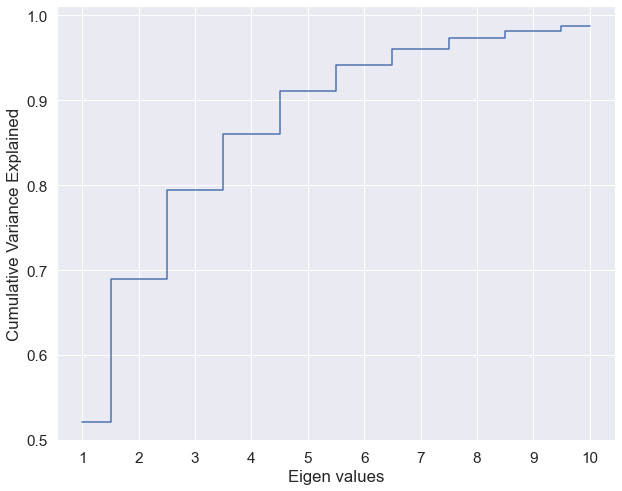

In [34]:
#Visualizing Cumulative Varinace Explained
plt.figure(figsize=(10,8))
plt.step(range(1, len(veh_pca.explained_variance_)+1), np.cumsum(veh_pca.explained_variance_ratio_), where='mid')
plt.xlabel('Eigen values')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(veh_pca.explained_variance_)+1))
plt.show();

#### 3E. Draw a horizontal line on the above plot to highlight the threshold of 90%. [1 Marks]

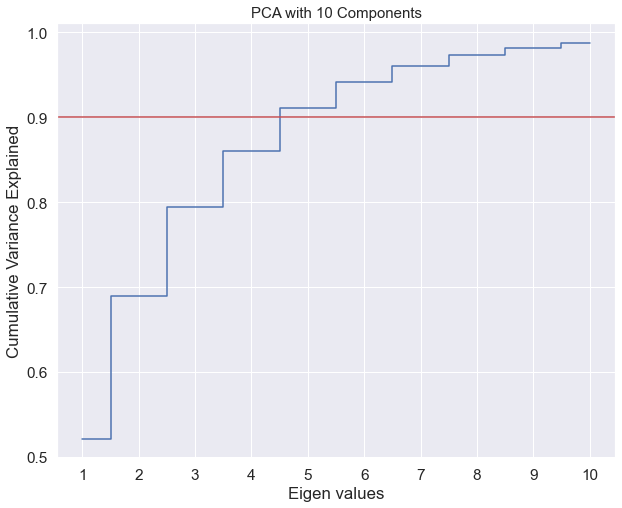

In [35]:
#Drawing a horizontal line at 90% threshold in above graph
plt.figure(figsize=(10,8))
plt.step(range(1, len(veh_pca.explained_variance_)+1), np.cumsum(veh_pca.explained_variance_ratio_), where='mid')
plt.xlabel('Eigen values')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(veh_pca.explained_variance_)+1))
plt.axhline(y= 0.9, color='r')
plt.title('PCA with 10 Components', fontdict={'fontsize': 15})
plt.show();

#### 3F. Apply PCA on the data. This time Select Minimum Components with 90% or above variance explained. [2 Marks]

In [36]:
#Applying PCA on data
veh_npca = PCA(n_components=len(x.columns))
veh_npca.fit(xscaled)

PCA(n_components=18)

Precise Variance Covered by Minimum Required Components (i.e. 5) for 90% or above: 0.9111576952449085 



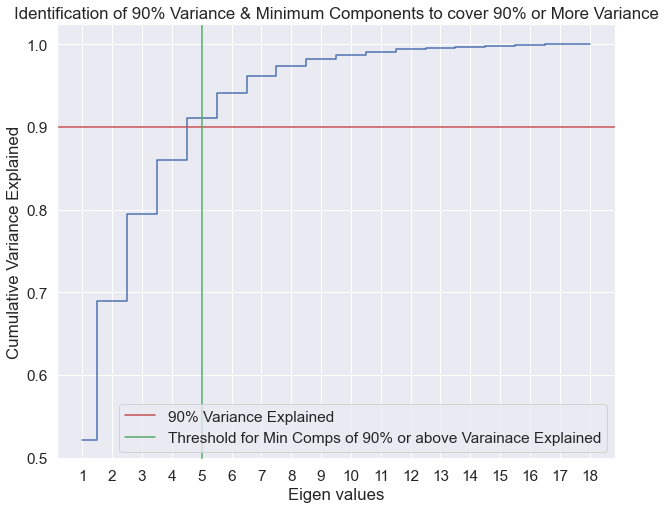

In [37]:
#Checking the number of components required for minimum 90% of explained variance
for var in range(1, len(veh_npca.explained_variance_ratio_)):
    if np.cumsum(veh_npca.explained_variance_ratio_)[var]<0.9:
        var+=1
    else:
        thresh = var+1 #Here we take next value of var i.e. var + 1, because we have given condition till the cumulative sum
                       # is less than 0.9. Hence if we go just 1 value above that, 90% or more varaince explained is captured.
        break;
print('Precise Variance Covered by Minimum Required Components (i.e. {}) for 90% or above: {}'.format(thresh, np.cumsum(veh_npca.explained_variance_ratio_)[thresh-1]), '\n')
#NOTE: Here we need to reduce 1 from thresh, i.e. thresh -1 as we have started with range from 1 & while in array of np.cumsum,
#it starts from 0. Hence thresh-1

#Ploting the graph to set threshold for 90% of minimum explianed variance
plt.figure(figsize=(10,8))
plt.step(range(1, len(veh_npca.explained_variance_)+1), np.cumsum(veh_npca.explained_variance_ratio_), where='mid')
plt.xlabel('Eigen values')
plt.ylabel('Cumulative Variance Explained')
plt.xticks(range(1, len(veh_pca.explained_variance_)+1))
plt.axhline(y=0.9, color='r', label='90% Variance Explained')
plt.axvline(x=thresh, color='g', label='Threshold for Min Comps of 90% or above Varainace Explained')
plt.legend(loc='lower right')
plt.xticks(range(1, len(veh_npca.explained_variance_)+1))
plt.title('Identification of 90% Variance & Minimum Components to cover 90% or More Variance')
plt.show();

- From the above graph we can interpret that to cover 90% or more Variance, the minimum components to be selected is 5.
- To be precise, selecting 5 components, we can cover 91.12% of the Varaince as visible from above.
- Hence we again apply PCA for 5 components covering more than 90% of the data.

In [38]:
#Applying PCA with 5 Components
veh_5pca = PCA(n_components=5)
veh_5pca.fit(xscaled)

PCA(n_components=5)

#### 3G. Train SVM model on components selected from above step. [1 Marks]

In [39]:
#To Train a model with these 5 components, initially we need to transform our xscaled data as per this PCA i.e. veh_5pca
#& convert it to dataframe & display it.
xscaled_5pca = pd.DataFrame(veh_5pca.transform(xscaled))
display(xscaled_5pca)

#Now we again split this new dataframe into train & test datasets.
xpca_tr, xpca_te, ypca_tr, ypca_te = train_test_split(xscaled_5pca, y, test_size=0.2, random_state=1234)

#Training a Classification Model for SVM after applying PCA with 5 components
veh_5pca_svm = svm.SVC()
veh_5pca_svm.fit(xpca_tr, ypca_tr)

,0,1,2,3,4
0,0.334162,-0.219026,1.001584,0.176612,0.079301
1,-1.591711,-0.420603,-0.369034,0.233234,0.693949
2,3.769324,0.195283,0.087859,1.202212,0.731732
3,-1.738598,-2.829692,0.109456,0.376685,-0.362897
4,0.558103,4.758422,11.703647,0.147464,3.256953
...,...,...,...,...,...
841,-0.442648,-0.605884,0.197213,-1.444958,1.065425
842,-0.314956,0.164511,0.794573,-0.908272,-0.235492
843,4.809174,-0.001249,0.532333,0.295652,-1.344236
844,-3.294092,-1.008276,-0.357003,-1.933675,0.042768


SVC()

#### 3H. Print Classification metrics for train data of above model and share insights. [2 Marks]

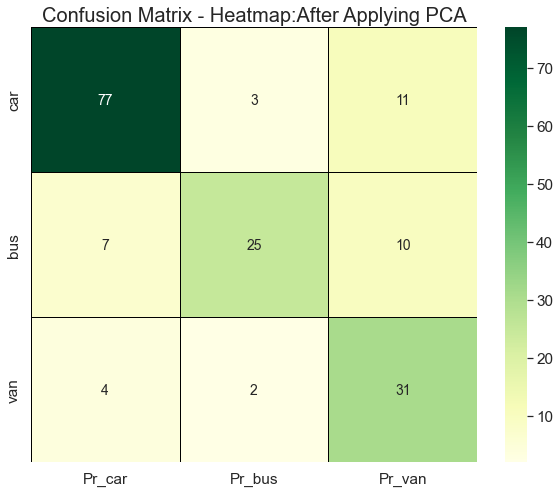

------------------------------  Classification Report:After Applying PCA  ------------------------------
              precision    recall  f1-score   support

         car       0.88      0.85      0.86        91
         bus       0.83      0.60      0.69        42
         van       0.60      0.84      0.70        37

    accuracy                           0.78       170
   macro avg       0.77      0.76      0.75       170
weighted avg       0.80      0.78      0.78       170



In [40]:
#Predicting the values for test data
veh_pca_pred = veh_5pca_svm.predict(xpca_te)

#Generating Confusion Matrix
veh_pca_cm = confusion_matrix(ypca_te, veh_pca_pred, labels= veh['class'].value_counts().index)

#Generating DataFrame of Confusion Matrix
pca_col_lab = ['Pr_' + str(n) for n in veh['class'].value_counts().index]
veh_pca_cmdf = pd.DataFrame(veh_pca_cm, index = veh['class'].value_counts().index, columns = pca_col_lab)

#Generating heatmap
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4) #to increasefont size of labels and axes
sns.heatmap(veh_pca_cmdf, annot=True, linewidth=1, cmap='YlGn', linecolor='black', annot_kws={'fontsize':'small'})
plt.title('Confusion Matrix - Heatmap:After Applying PCA', fontdict={'fontsize': 20})
plt.show();

#Generating Classifiction Report
print('-'*30, '\033[1;3m Classification Report:After Applying PCA \033[0m', '-'*30)
print(classification_report(ypca_te, veh_pca_pred, labels=veh['class'].value_counts().index))

- Here we can note that, the accuracy of the model has dropped significantly, i.e. priorly it was 96% but after applying PCA (with only 5 components) the accuracy is only 78%.
- Also other classification factors like precision, recall, f1-score seems to have been dropped significantly for all the target values.
- We can observe that by removing 10% or less data (here 8.88%, as we have considered 91.12%), we have dropped the accuracy of the model by 18%.

### 4. Performance Improvement: [5 Marks]

#### 4A. Train another SVM on the components out of PCA. Tune the parameters to improve performance. [2 Marks]

In [41]:
svm_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
              'kernel':['rbf', 'linear', 'sigmoid']}
pca_grid = GridSearchCV(svm.SVC(), svm_params, refit=True, verbose=3)
pca_grid.fit(xpca_tr, ypca_tr)

Fitting 5 folds for each of 147 candidates, totalling 735 fits
[CV 1/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.493 total time=   0.0s
[CV 2/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.496 total time=   0.0s
[CV 3/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.0s
[CV 4/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.0s
[CV 5/5] END .C=0.001, gamma=0.0001, kernel=rbf;, score=0.504 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.0001, kernel=linear;, score=0.500 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.0001, kernel=linear;, score=0.496 total time=   0.0s
[CV 3/5] END C=0.001, gamma=0.0001, kernel=linear;, score=0.511 total time=   0.0s
[CV 4/5] END C=0.001, gamma=0.0001, kernel=linear;, score=0.504 total time=   0.0s
[CV 5/5] END C=0.001, gamma=0.0001, kernel=linear;, score=0.511 total time=   0.0s
[CV 1/5] END C=0.001, gamma=0.0001, kernel=sigmoid;, score=0.493 total time=   0.0s
[CV 2/5] END C=0.001, gamma=0.000

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['rbf', 'linear', 'sigmoid']},
             verbose=3)

#### 4B. Share best Parameters observed from above step. [1 Marks]

In [42]:
#Getting the best parameters
print(pca_grid.best_params_)
pca_grid.best_estimator_

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


SVC(C=10, gamma=0.1)

#### 4C. Print Classification metrics for train data of above model and share relative improvement in performance in all the models along with insights. [2 Marks]

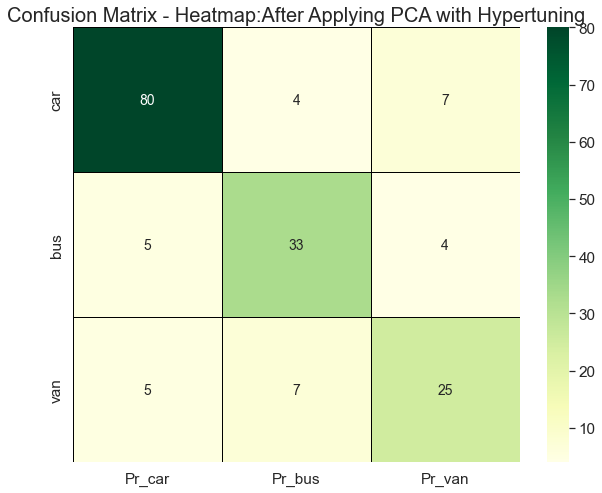

------------------------------  Classification Report:After Applying PCA with Hypertuning  ------------------------------
              precision    recall  f1-score   support

         car       0.89      0.88      0.88        91
         bus       0.75      0.79      0.77        42
         van       0.69      0.68      0.68        37

    accuracy                           0.81       170
   macro avg       0.78      0.78      0.78       170
weighted avg       0.81      0.81      0.81       170



In [43]:
#Predicting the values for test data
veh_pca_grid_pred = pca_grid.predict(xpca_te)

#Generating Confusion Matrix
veh_pca_grid_cm = confusion_matrix(ypca_te, veh_pca_grid_pred, labels= veh['class'].value_counts().index)

#Generating DataFrame of Confusion Matrix
pca_grid_col_lab = ['Pr_' + str(n) for n in veh['class'].value_counts().index]
veh_pca_grid_cmdf = pd.DataFrame(veh_pca_grid_cm, index = veh['class'].value_counts().index, columns = pca_grid_col_lab)

#Generating heatmap
plt.figure(figsize=(10,8))
sns.set(font_scale=1.4) #to increasefont size of labels and axes
sns.heatmap(veh_pca_grid_cmdf, annot=True, linewidth=1, cmap='YlGn', linecolor='black', annot_kws={'fontsize':'small'})
plt.title('Confusion Matrix - Heatmap:After Applying PCA with Hypertuning', fontdict={'fontsize': 20})
plt.show();

#Generating Classifiction Report
print('-'*30, '\033[1;3m Classification Report:After Applying PCA with Hypertuning \033[0m', '-'*30)
print(classification_report(ypca_te, veh_pca_grid_pred, labels=veh['class'].value_counts().index))

##### Improvements:
- We can observe that with hypertuning the parameters of the SVM model & considering the same PCA model used in prior SVM model, the accuracy has improved by 3%, i.e. it has increased from 78% to 81%.

##### Insights:
- We observed that by capturing only around 90% (here 91.12%) of the original data we were able to predict with 78% accuracy.
- By Hyertuning we could achieve even higher accuracy i.e. 81% from the same PCA components.
- Hence it may even be possible to achieve more than 90% accuracy if we consider 95% or more of the original dataset.
- One important thing which we can conclude is when we removed only 10% of the origianl data, accuracy was dropped drastically. It means that the origianal dataset contains information in high amount & noise in much lesser amount. We can say that the data which we have received is highly refined & almost all the information can be considered crucial.
- The above statement can be justified with the level of accuracy achieved with original dataset which was 96%.
- If instead of applying PCA we can just tune the Hyperparameters of the SVM model, it is possible to even higher accuracy. 

### 5. Data Understanding & Cleaning: [5 Marks]

#### 5A. Explain pre-requisite/assumptions of PCA. [2 Marks]

##### Pre-requisite /  Assumptions of of PCA are as follows:
1. PCA assumes a correlation between features.
2. PCA assumes a liinear relationship between the features.
3. PCA assumes that the data has no missing values. Hence it is extremely important to remove the missing values before computing.
4. PCA assumes that the principal component with highest variance is the most important & give it the highest attention while components with lower variance are given less importance or maybe considered as noise. Hence scaling is necessary prior to applying PCA.

#### 5B. Explain advantages and limitations of PCA. [3 Marks]

##### Advantages of PCA are as follows:
1. Removes the correlation amongst the feature variable.
2. PCA helps to remove the overfitting by compressing information/reducing dimensions.
3. PCA improves Data Visualization.
4. PCA thus helps improves performance of Algorithm.

##### Limitations/Disadvantages of PCA.
1. Data Normalization / Data Scaling must be done before applying PCA.
2. In order to reduce dimensions / compress information some of the information maybe lost.
3. Independent variable becomes less interpretable.
4. The Principal Components looses their originality as the new variables formed as a result of PCA are hard to understand.